In [1]:
# Импорт модулей для работы с массивами
import numpy as np
import pandas as pd

# Импорт средств построений графиков
import seaborn as sns
from pylab import rcParams
from matplotlib import pyplot

# Импорт инструментов подготовки данных, кросвалидации и оценки
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Импорт классификаторов из sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

from imblearn.over_sampling import RandomOverSampler
# Генератор псевдослучайной последовательности 
seed = 228

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Импорт данных
red = pd.read_csv('winequality-red.csv', sep =';')
white = pd.read_csv('winequality-white.csv', sep =';')

In [3]:
# выделим отдельно признаки
feature = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
           'total sulfur dioxide','density','pH','sulphates','alcohol']

# Разделим массивы признаков и метоки классов
X_red = red[feature]
y_red = red['quality']

X_white = white[feature]
y_white = white['quality']

# Масштабирование признаков путём нормализации MinMax
X_red = MinMaxScaler().fit_transform(X_red) 
X_white = MinMaxScaler().fit_transform(X_white) 

In [4]:
# Разделим на обучающую и тестовую выборки
# Красное
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_red, y_red, test_size=0.3)

# Белое
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_white, y_white, test_size=0.3)

#### Обучение группы моделей из sklearn

In [5]:
# Запустим с 3-fold кросс валидацией
num_folds = 3
# В качестве метрики используем accuracy 
scoring = 'accuracy'

In [6]:
# Зададим множество ML алгоритмов из sklearn

models = []
models.append(('LinearDiscriminant', LinearDiscriminantAnalysis()))
models.append(('DecisionTree......', DecisionTreeClassifier(random_state=seed)))
models.append(('GaussianNB........', GaussianNB()))
models.append(('KNeighbors........', KNeighborsClassifier()))
models.append(('SupportVector.....', SVC(random_state=seed, gamma = 'auto')))
models.append(('Bagging...........', BaggingClassifier(random_state=seed)))
models.append(('RandomForest......', RandomForestClassifier(random_state=seed)))
models.append(('ExtraTrees........', ExtraTreesClassifier(random_state=seed)))
models.append(('AdaBoost..........', AdaBoostClassifier(random_state=seed)))
models.append(('GradientBoosting..', GradientBoostingClassifier(random_state=seed)))

# массивы для результатов
results = []
names = []
metrics = []

In [7]:
# Сгенирируем модели поочередно с учетом кросс-валидации для Красного вина
print('для Красного вина результат классификации: ')

for name, model in models:
    
    # кросс-валидация
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    # оценка результатов
    cv_results = cross_val_score(model, X_train_r, y_train_r, cv=kfold, scoring=scoring)
    
    # добавление результатов в массив
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    
    # формирование сообщения
    output_message= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(output_message)

для Красного вина результат классификации: 
LinearDiscriminant: 0.577301 (0.018617)
DecisionTree......: 0.553172 (0.017828)
GaussianNB........: 0.529937 (0.021596)
KNeighbors........: 0.554066 (0.028569)
SupportVector.....: 0.567471 (0.008847)
Bagging...........: 0.601430 (0.024013)
RandomForest......: 0.600536 (0.017512)
ExtraTrees........: 0.614835 (0.012056)
AdaBoost..........: 0.547811 (0.015530)
GradientBoosting..: 0.621984 (0.017918)


In [8]:
# Сгенирируем модели поочередно с учетом кросс-валидации для Белого вина
print('для Белого вина результат классификации: ')

for name, model in models:
    
    # кросс-валидация
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    # оценка результатов
    cv_results = cross_val_score(model, X_train_w, y_train_w, cv=kfold, scoring=scoring)
    
    # добавление результатов в массив
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    
    # формирование сообщения
    output_message= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(output_message)

для Белого вина результат классификации: 
LinearDiscriminant: 0.530931 (0.029800)
DecisionTree......: 0.535885 (0.010240)
GaussianNB........: 0.436989 (0.002929)
KNeighbors........: 0.539681 (0.025135)
SupportVector.....: 0.499713 (0.022997)
Bagging...........: 0.587812 (0.020306)
RandomForest......: 0.610856 (0.010607)
ExtraTrees........: 0.610274 (0.022644)
AdaBoost..........: 0.442832 (0.021042)
GradientBoosting..: 0.583440 (0.025227)


#### В качестве промежуточного вывода: слишком много классов при том классы между собой несбалансированы имеет смысл использовать компенсирующие методы, undersampling или oversampling. Но так как Undersampling фактически сократит размер выборки (а у красного вина она и так не большая) его использовать не стоит. Для Oversampling'а мало значений недостающих классов (как видно из ноутбука с анализом датасета). 

#### Сделаем тривиально-сократим количество классов.

In [9]:
# преобразуем оценку качетсва вина (quality) 
#в три категории и посмотрим увеличится ли от этого точность работы алгоритмов

# 3 - плохое вино от 0 до 4
# 2 - среднее вино от 4 до 6 
# 1 - хорошее вино от 6 до 10

# Преобразуем диапазоны меток quality в 3 категории
rating_bins = [0, 4, 6, 10]
rating_labels = [3,2,1]

red['quality'] = pd.cut(red['quality'], bins=rating_bins, labels=rating_labels)
white['quality'] = pd.cut(white['quality'], bins=rating_bins, labels=rating_labels)

### Проверка на множестве алгоритмов после преобразования классов

In [10]:
# так как вносили изминения в исходный pandas data frame сформируем еще раз тренировочную и тестовую выборки

X_red = red[feature]
y_red = red['quality']

X_white = white[feature]
y_white = white['quality']

# Масштабирование признаков путём нормализации MinMax
X_red = MinMaxScaler().fit_transform(X_red) 
X_white = MinMaxScaler().fit_transform(X_white) 

# Разделим на обучающую и тестовую выборки
# Красное
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_red, y_red, test_size=0.3)

# Белое
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_white, y_white, test_size=0.3)

In [11]:
# Сгенирируем модели поочередно с учетом кросс-валидации для Красного вина
print('для Красного вина результат классификации: ')

for name, model in models:
    
    # кросс-валидация
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    # оценка результатов
    cv_results = cross_val_score(model, X_train_r, y_train_r, cv=kfold, scoring=scoring)
    
    # добавление результатов в массив
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    
    # формирование сообщения
    output_message= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(output_message)

для Красного вина результат классификации: 
LinearDiscriminant: 0.825737 (0.023166)
DecisionTree......: 0.812332 (0.019456)
GaussianNB........: 0.780161 (0.013670)
KNeighbors........: 0.823056 (0.010031)
SupportVector.....: 0.815907 (0.023406)
Bagging...........: 0.858803 (0.010345)
RandomForest......: 0.840929 (0.016135)
ExtraTrees........: 0.842717 (0.014243)
AdaBoost..........: 0.740840 (0.016430)
GradientBoosting..: 0.851653 (0.003344)


In [12]:
# Сгенирируем модели поочередно с учетом кросс-валидации для Белого вина
print('для Белого вина результат классификации: ')

for name, model in models:
    
    # кросс-валидация
    kfold = KFold(n_splits=num_folds, random_state=seed)
    
    # оценка результатов
    cv_results = cross_val_score(model, X_train_w, y_train_w, cv=kfold, scoring=scoring)
    
    # добавление результатов в массив
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    
    # формирование сообщения
    output_message= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    
    print(output_message)

для Белого вина результат классификации: 
LinearDiscriminant: 0.754956 (0.008218)
DecisionTree......: 0.750581 (0.006189)
GaussianNB........: 0.673571 (0.004288)
KNeighbors........: 0.764295 (0.006919)
SupportVector.....: 0.740373 (0.008152)
Bagging...........: 0.802217 (0.001431)
RandomForest......: 0.806303 (0.011719)
ExtraTrees........: 0.811553 (0.004724)
AdaBoost..........: 0.727246 (0.003942)
GradientBoosting..: 0.790256 (0.004795)


Как видно из оценок, accuracy после уменьшения количества классов стала значительно выше.

#### Выполним подстройку праметров некоторых наиболее точных классификаторов с помощью GridSearch 
#### Красное вино

In [13]:
# зададим массивы для сравнения результатов подстройки
results_red = []
names_red = []

In [14]:
# С помощью инструмента GridSearch выполним подбор параметров для красного вина
print('Для красного вина accuracy RandomForest:')

# задание параметров сетки
paramGrid1 = dict(n_estimators=np.array([50,100,200,400,600,800,900]), max_depth = [2,4,6,8,10,12] )

# зададим модель
model1 = RandomForestClassifier(random_state=seed)

# кросс-валидация
kfold = KFold(n_splits=num_folds, random_state=seed)

# сетка
grid1 = GridSearchCV(estimator=model1, param_grid=paramGrid1, scoring=scoring, cv=kfold)

#результаты сетки
grid_result1 = grid1.fit(X_train_r, y_train_r)

print("Best: %f using %s" % (grid_result1.best_score_, grid_result1.best_params_))

# сохранение в массив результатов
results_red.append(grid_result1.cv_results_['mean_test_score'])
names_red.append('RandomForest')

# переменные для вывода параметров
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']

# Вывод оценок после подбора параметров
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Для красного вина accuracy RandomForest:
Best: 0.858803 using {'max_depth': 12, 'n_estimators': 600}
0.819482 (0.026480) with: {'max_depth': 2, 'n_estimators': 50}
0.818588 (0.025653) with: {'max_depth': 2, 'n_estimators': 100}
0.821269 (0.028232) with: {'max_depth': 2, 'n_estimators': 200}
0.819482 (0.026116) with: {'max_depth': 2, 'n_estimators': 400}
0.822163 (0.028569) with: {'max_depth': 2, 'n_estimators': 600}
0.822163 (0.028569) with: {'max_depth': 2, 'n_estimators': 800}
0.822163 (0.028569) with: {'max_depth': 2, 'n_estimators': 900}
0.833780 (0.020882) with: {'max_depth': 4, 'n_estimators': 50}
0.843610 (0.025931) with: {'max_depth': 4, 'n_estimators': 100}
0.840036 (0.025371) with: {'max_depth': 4, 'n_estimators': 200}
0.839142 (0.024669) with: {'max_depth': 4, 'n_estimators': 400}
0.839142 (0.024669) with: {'max_depth': 4, 'n_estimators': 600}
0.840036 (0.023406) with: {'max_depth': 4, 'n_estimators': 800}
0.840036 (0.023406) with: {'max_depth': 4, 'n_estimators': 900}
0.840

In [15]:
# С помощью инструмента GridSearch выполним подбор параметров для красного вина
print('Для красного вина accuracy ExtraTrees:')

# задание параметров сетки
paramGrid2 = dict(n_estimators=np.array([50,100,200,400,600,800,900]), max_depth = [2,4,6,8,10,12] )

# зададим модель
model2 = ExtraTreesClassifier(random_state=seed)

# кросс-валидация
kfold = KFold(n_splits=num_folds, random_state=seed)

# сетка
grid2 = GridSearchCV(estimator=model2, param_grid=paramGrid2, scoring=scoring, cv=kfold)

#результаты сетки
grid_result2 = grid2.fit(X_train_r, y_train_r)

print("Best: %f using %s" % (grid_result2.best_score_, grid_result2.best_params_))

# сохранение в массив результатов
results_red.append(grid_result2.cv_results_['mean_test_score'])
names_red.append('ExtraTrees')

# переменные для вывода параметров
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']

# Вывод парметров подбора параметров
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Для красного вина accuracy ExtraTrees:
Best: 0.855228 using {'max_depth': 12, 'n_estimators': 50}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 50}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 100}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 200}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 400}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 600}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 800}
0.815907 (0.023406) with: {'max_depth': 2, 'n_estimators': 900}
0.818588 (0.025371) with: {'max_depth': 4, 'n_estimators': 50}
0.816801 (0.024112) with: {'max_depth': 4, 'n_estimators': 100}
0.817694 (0.024669) with: {'max_depth': 4, 'n_estimators': 200}
0.817694 (0.024669) with: {'max_depth': 4, 'n_estimators': 400}
0.817694 (0.024669) with: {'max_depth': 4, 'n_estimators': 600}
0.817694 (0.024669) with: {'max_depth': 4, 'n_estimators': 800}
0.817694 (0.024669) with: {'max_depth': 4, 'n_estimators': 900}
0.827525

#### Сравним алгоритмы с помощью Boxplot

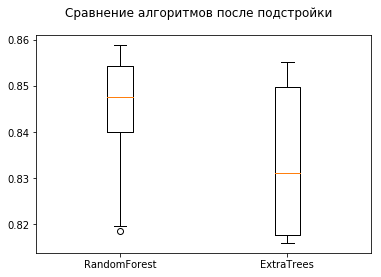

In [16]:
fig = pyplot.figure()
fig.suptitle('Сравнение алгоритмов после подстройки')
ax = fig.add_subplot(111)
pyplot.boxplot(results_red)
ax.set_xticklabels(names_red)
pyplot.show()

#### для оценки красного вина наивысшую accuracy имеет RandomForest Classifier

#### Белое вино

In [17]:
# зададим массивы для сравнения результатов подстройки
results_white = []
names_white = []

In [18]:
# С помощью инструмента GridSearch выполним подбор параметров для белого вина
print('Для красного вина accuracy BaggingClassifier:')

# задание параметров сетки
paramGrid3 = dict(n_estimators=np.array([50,100,200,400,600,800,900]))

# зададим модель
model3 = BaggingClassifier(random_state=seed)

# кросс-валидация
kfold = KFold(n_splits=num_folds, random_state=seed)

# сетка
grid3 = GridSearchCV(estimator=model3, param_grid=paramGrid3, scoring=scoring, cv=kfold)

#результаты сетки
grid_result3 = grid3.fit(X_train_w, y_train_w)

print("Best: %f using %s" % (grid_result3.best_score_, grid_result3.best_params_))

# сохранение в массив результатов
results_white.append(grid_result3.cv_results_['mean_test_score'])
names_white.append('BaggingClassifier')

# переменные для вывода параметров
means = grid_result3.cv_results_['mean_test_score']
stds = grid_result3.cv_results_['std_test_score']
params = grid_result3.cv_results_['params']

# Вывод парметров подбора параметров
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Для красного вина accuracy BaggingClassifier:
Best: 0.822637 using {'n_estimators': 400}
0.811844 (0.001815) with: {'n_estimators': 50}
0.818261 (0.006023) with: {'n_estimators': 100}
0.818845 (0.001494) with: {'n_estimators': 200}
0.822637 (0.001108) with: {'n_estimators': 400}
0.822345 (0.001868) with: {'n_estimators': 600}
0.820887 (0.001858) with: {'n_estimators': 800}
0.820012 (0.002925) with: {'n_estimators': 900}


In [19]:
# С помощью инструмента GridSearch выполним подбор параметров для белого вина
print('Для белого вина accuracy RandomForest:')

# задание параметров сетки
paramGrid4 = dict(n_estimators=np.array([200,400,600,800,900]), max_depth = [6,8,10,12] )

# зададим модель
model4 = RandomForestClassifier(random_state=seed)

# кросс-валидация
kfold = KFold(n_splits=num_folds, random_state=seed)

# сетка
grid4 = GridSearchCV(estimator=model4, param_grid=paramGrid4, scoring=scoring, cv=kfold)

# результаты сетки
grid_result4 = grid4.fit(X_train_w, y_train_w)

print("Best: %f using %s" % (grid_result4.best_score_, grid_result4.best_params_))

# сохранение в массив результатов
results_white.append(grid_result4.cv_results_['mean_test_score'])
names_white.append('RandomForest')

# переменные для вывода параметров
means = grid_result4.cv_results_['mean_test_score']
stds = grid_result4.cv_results_['std_test_score']
params = grid_result4.cv_results_['params']

# Вывод парметров подбора параметров
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Для белого вина accuracy RandomForest:
Best: 0.818261 using {'max_depth': 12, 'n_estimators': 400}
0.780922 (0.004651) with: {'max_depth': 6, 'n_estimators': 200}
0.777713 (0.002938) with: {'max_depth': 6, 'n_estimators': 400}
0.778005 (0.003579) with: {'max_depth': 6, 'n_estimators': 600}
0.778005 (0.001873) with: {'max_depth': 6, 'n_estimators': 800}
0.778588 (0.004050) with: {'max_depth': 6, 'n_estimators': 900}
0.790840 (0.002070) with: {'max_depth': 8, 'n_estimators': 200}
0.789673 (0.001174) with: {'max_depth': 8, 'n_estimators': 400}
0.792007 (0.001158) with: {'max_depth': 8, 'n_estimators': 600}
0.792007 (0.003258) with: {'max_depth': 8, 'n_estimators': 800}
0.791424 (0.003604) with: {'max_depth': 8, 'n_estimators': 900}
0.802217 (0.003835) with: {'max_depth': 10, 'n_estimators': 200}
0.807468 (0.004696) with: {'max_depth': 10, 'n_estimators': 400}
0.806009 (0.005366) with: {'max_depth': 10, 'n_estimators': 600}
0.805426 (0.004351) with: {'max_depth': 10, 'n_estimators': 800}
0

#### Сравним алгоритмы с помощью Boxplot

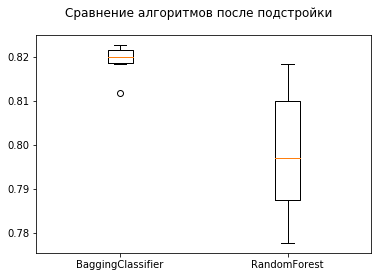

In [20]:
fig = pyplot.figure()
fig.suptitle('Сравнение алгоритмов после подстройки')
ax = fig.add_subplot(111)
pyplot.boxplot(results_white)
ax.set_xticklabels(names_white)
pyplot.show()

#### для оценки белого вина на тренирововчной выборке BaggingClasifier имеет наивысшую accuracy

### Выполним оценку на тестовой выборке для красного вина

In [21]:
# Обучим на тренировочных данных
model_red = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed, class_weight='balanced')
model_red.fit(X_train_r, y_train_r)

# Выполним оценку на тестовых
predictions = model_red.predict(X_test_r)

print(accuracy_score(y_test_r, predictions))
print(confusion_matrix(y_test_r, predictions))
print(classification_report(y_test_r, predictions))

0.8604166666666667
[[ 34  23   0]
 [ 25 379   2]
 [  1  16   0]]
              precision    recall  f1-score   support

           1       0.57      0.60      0.58        57
           2       0.91      0.93      0.92       406
           3       0.00      0.00      0.00        17

   micro avg       0.86      0.86      0.86       480
   macro avg       0.49      0.51      0.50       480
weighted avg       0.83      0.86      0.85       480



### Выполним оценку на тестовой выборке для белого вина

In [22]:
# Обучим на тренировочных данных
model_white = BaggingClassifier(n_estimators=200, random_state=seed)
model_white.fit(X_train_w, y_train_w)

# Выполним оценку на тестовых
predictions = model_white.predict(X_test_w)

print(accuracy_score(y_test_w, predictions))
print(confusion_matrix(y_test_w, predictions))
print(classification_report(y_test_w, predictions))

0.8408163265306122
[[ 192  113    0]
 [  73 1036    8]
 [   1   39    8]]
              precision    recall  f1-score   support

           1       0.72      0.63      0.67       305
           2       0.87      0.93      0.90      1117
           3       0.50      0.17      0.25        48

   micro avg       0.84      0.84      0.84      1470
   macro avg       0.70      0.57      0.61      1470
weighted avg       0.83      0.84      0.83      1470



#### Вывод: из-за несбалансированности классов определение вин качества 1 и 3 (в обоих вин затрудняется)
#### * Способы возможного разрешения: регулировка весов малочисленных классов, оверсамплинг малочисленных классов

#### попробуем сделать oversampling для классов 1 и 3 
### Красное

In [23]:
ros = RandomOverSampler(random_state=seed)
X_resampled, y_resampled = ros.fit_resample(X_train_r, y_train_r)

[2 2 1 ... 3 3 3]


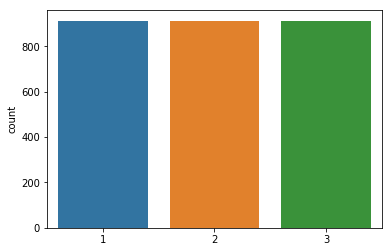

In [24]:
U = {'x_vector': y_resampled}
sns.countplot(x = 'x_vector', data=U)
print(y_resampled)

In [25]:
# Обучим на тренировочных данных
model_red = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
model_red.fit(X_resampled, y_resampled)

# Выполним оценку на тестовых до oversampling'а
predictions = model_red.predict(X_test_r)

print(accuracy_score(y_test_r, predictions))
print(confusion_matrix(y_test_r, predictions))
print(classification_report(y_test_r, predictions))

0.8333333333333334
[[ 38  19   0]
 [ 34 362  10]
 [  1  16   0]]
              precision    recall  f1-score   support

           1       0.52      0.67      0.58        57
           2       0.91      0.89      0.90       406
           3       0.00      0.00      0.00        17

   micro avg       0.83      0.83      0.83       480
   macro avg       0.48      0.52      0.50       480
weighted avg       0.83      0.83      0.83       480



### Белое

In [26]:
# oversampling
ros = RandomOverSampler(random_state=seed)
X_resampled_white, y_resampled_white = ros.fit_resample(X_train_w, y_train_w)

[2 2 2 ... 3 3 3]


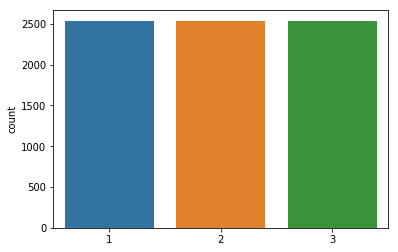

In [27]:
U_white = {'x_vector': y_resampled_white}
sns.countplot(x = 'x_vector', data=U_white)
print(y_resampled_white)

In [28]:
# Обучим на всех данных
model_white = BaggingClassifier(n_estimators=800, random_state=seed)
model_white.fit(X_resampled_white, y_resampled_white)

# Выполним оценку на тестовых до oversampling'а
predictions = model_white.predict(X_test_w)

print(accuracy_score(y_test_w, predictions))
print(confusion_matrix(y_test_w, predictions))
print(classification_report(y_test_w, predictions))

0.8319727891156462
[[ 207   96    2]
 [  97 1005   15]
 [   0   37   11]]
              precision    recall  f1-score   support

           1       0.68      0.68      0.68       305
           2       0.88      0.90      0.89      1117
           3       0.39      0.23      0.29        48

   micro avg       0.83      0.83      0.83      1470
   macro avg       0.65      0.60      0.62      1470
weighted avg       0.83      0.83      0.83      1470



##### С помощью оверсамплинга удалось улучшить несколько улучшить отдельные метрики, при этом средние немного ухудшились

### Сохраним модели для дальнейшего использования 

In [29]:
#Oversampling для всех данных

ros = RandomOverSampler(random_state=seed)
X_resampled, y_resampled = ros.fit_resample(X_red, y_red)

# для начала обучим модель на всех данных 
# модель для красного вина

model_red_final = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=seed)
model_red_final.fit(X_resampled, y_resampled)
print ('Модель обучена!')

Модель обучена!


In [30]:
# Сохранение

modelName = 'Red_wine_quality_RF.sav'
dump(model_red_final, modelName)

['Red_wine_quality_RF.sav']

In [31]:
#Oversampling для всех данных

ros = RandomOverSampler(random_state=seed)
X_resampled, y_resampled = ros.fit_resample(X_white, y_white)

# для начала обучим модель на всех данных 
# модель для белого вина

model_white_final = BaggingClassifier(n_estimators=800, random_state=seed)
model_white_final.fit(X_resampled, y_resampled)
print ('Модель обучена!')

Модель обучена!


In [32]:
# Сохранение

modelName_w = 'White_wine_quality_RF.sav'
dump(model_white_final, modelName_w)

['White_wine_quality_RF.sav']